2D Visualization Using PCA

#Pick first 15K data—points to work on for time—effeciency.
#Excercise: Perform the same analysis on all of 42K data—points.

In [36]:
#load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
#import file
d0 =pd.read_csv("./mnist_train.csv")
print(d0.head(5))

# save the labels into a variable l.
l = d0['label']

# Drop the label feature and store the pixel data in d.
d = d0.drop("label",axis=1)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [38]:
labels = l.head(15000)
data = d.head(15000)

print("The shape of sample data = ",data.shape)

The shape of sample data =  (15000, 784)


In [39]:
# display or plot a number.
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [40]:
#find the co-variation matrix which is :A^T *A
sample_data = standardized_data

#matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T,sample_data)

print("The sahpe of co-variance matrix = ", covar_matrix.shape)

The sahpe of co-variance matrix =  (784, 784)


In [41]:
# finding the top two eigen—values and corresponding eigen—vectors
# for projecting onto a 2—Dim space.
from scipy.linalg import eigh

In [42]:
# the parameter ' is defined (Iow value to heigh value)
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
value, vectors = eigh(covar_matrix, eigvals=(782,783))

print("shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T
print("Update shape of eigen vectors = ",vectors.shape)
# here the vectors [11 represent the eigen vector corresponding 1st principal eigen vecto
# here the vectors[01 represent the eigen vector corresponding 2nd principal eigen vecto

shape of eigen vectors =  (784, 2)
Update shape of eigen vectors =  (2, 784)


In [43]:
# projecting the original data sample on the plane
#formed by two principal eigen vectors by vector—vector multiplication.
import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print("resultant new data points' shape", vectors.shape,"X", sample_data.T.shape," = ", new_coordinates.shape)


resultant new data points' shape (2, 784) X (784, 15000)  =  (2, 15000)


In [44]:
import pandas as pd
# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

#create a new data frame for ploting the labled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


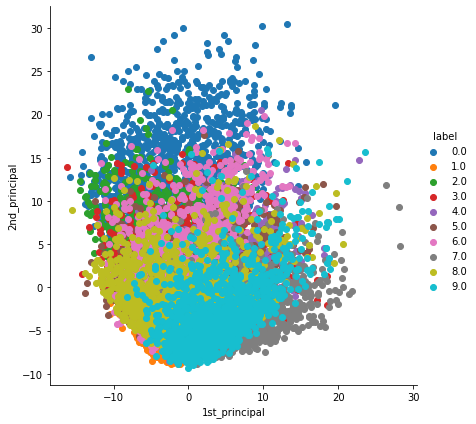

In [45]:
#ploting the sd data point with seaborn
import seaborn as sn 
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, "1st_principal", "2nd_principal").add_legend()
plt.show()

PCA using Scikit-Learn

In [46]:
#inatializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

In [47]:
#configuring the parameteres 
#the number of components  =2
pca.n_components =2
pca_data = pca.fit_transform(sample_data)

#pca_reduced will contain the 2-d project of simple data
print("Shape of PCA_reduced.shape = ", pca_data.shape)

Shape of PCA_reduced.shape =  (15000, 2)


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


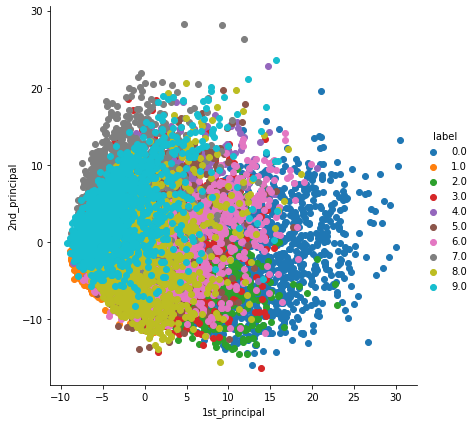

In [48]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()